# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [30]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


/content/Scrapify
No local changes to save
Already up to date.
  Using cached asgiref-3.8.1-py3-none-any.whl.metadata (9.3 kB)
  Using cached asttokens-2.4.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cryptography-44.0.2-cp39-abi3-manylinux_2_34_x86_64.whl.metadata (5.7 kB)
  Using cached debugpy-1.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached distlib-0.3.9-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached Django-5.1.3-py3-none-any.wh

In [31]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

Everything is ready you can start working 🎉🎉🎉🎉


In [33]:
import sys
sys.path.append('/content/Scrapify/src')

In [35]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic as normalize

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [ ]:
!pip install googlesearch-python

In [39]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num=num_results, stop=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [42]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

In [44]:
simple_query = 'site:gov.et filetype:pdf "አካባቢ ግንባታ" OR "አካባቢ መረጃ" OR "ሕግ ስርዓት" OR "የግል ተቋማት" OR "አስተዳደር ስርዓት" OR "የመንግስት ትእዛዝ" OR "የትእዛዝ ቁጥር" OR "የፌዴራል መብት" OR "የአካባቢ መንግሥት"'
urls = get_links_from_simple_search(simple_query, 100)
filtered_urls = filter_url(urls)
# scrape(filtered_urls, "Yonas Awoke")



# **Lets visualize our scraping status**

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




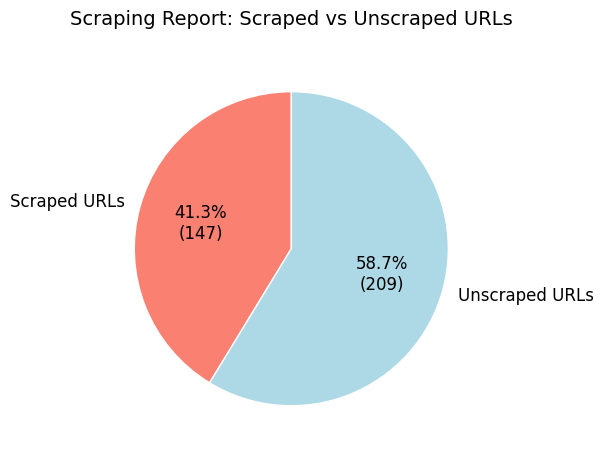

In [51]:
# Example usage:
plot_scraping_report()

### Normalizing our data

In [55]:
# let's test our data so that


test_string = """
ሀሁሂሃሄህሆ  # Basic ሀ family
ሐሑሒሓሔሕሖ  # �ሐ → ሀ variants
ኀኁኂኃኄኅኆ  # ኀ → ሀ variants
ኹኺኻኼኽኾ    # ኹ → ሁ variants
ሠሡሢሣሤሥሦ  # ሠ → ሰ variants
ዐዑዒዓዔዕዖ  # ዐ → አ variants
ጸጹጺጻጼጽጾ  # ጸ → ፀ variants

Punctuation Tests:
Newlines\nand\t tabs
Double colons:: ። Amharic period
Multiple spaces   between   words

Number Tests (Western): 1234567890
Number Tests (Eastern): ١٢٣٤٥٦٧٨٩٠

Edge Cases:
Empty string: ''
Mixed variants: ሐኀሠዐጸ in one word
"""

# Test the function in Colab
normalized_text = normalize(test_string)
print("Original:\n", test_string)
print("\nNormalized:\n", normalized_text)

Original:
 
ሀሁሂሃሄህሆ  # Basic ሀ family
ሐሑሒሓሔሕሖ  # �ሐ → ሀ variants
ኀኁኂኃኄኅኆ  # ኀ → ሀ variants
ኹኺኻኼኽኾ    # ኹ → ሁ variants
ሠሡሢሣሤሥሦ  # ሠ → ሰ variants
ዐዑዒዓዔዕዖ  # ዐ → አ variants
ጸጹጺጻጼጽጾ  # ጸ → ፀ variants

Punctuation Tests:
Newlines
and	 tabs
Double colons:: ። Amharic period
Multiple spaces   between   words

Number Tests (Western): 1234567890
Number Tests (Eastern): ١٢٣٤٥٦٧٨٩٠

Edge Cases:
Empty string: ''
Mixed variants: ሐኀሠዐጸ in one word


Normalized:
  ሀሁሂሃሄህሆ  # Basic ሀ family ሀሁሂሃሄህሆ  # �ሀ → ሀ variants ሀሁሂሃሄህሆ  # ሀ → ሀ variants ሁሂሃሄህሆ    # ሁ → ሁ variants ሰሱሲሳሴስሶ  # ሰ → ሰ variants አኡኢኣኤእኦ  # አ → አ variants ፀፁፂፃፄፅፆ  # ፀ → ፀ variants  Punctuation Tests: Newlines and	 tabs Double colons. . Amharic period Multiple spaces   between   words  Number Tests (Western): 1234567890 Number Tests (Eastern): ١٢٣٤٥٦٧٨٩٠  Edge Cases: Empty string: '' Mixed variants: ሀሀሰአፀ in one word 


In [57]:

import json

def read_jsonl_file(file_path):
    """
    Reads a .jsonl file and returns its contents as a list of dictionaries.

    Args:
        file_path (str): Path to the .jsonl file

    Returns:
        list: List of dictionaries containing the JSON data from each line

    Raises:
        FileNotFoundError: If the file doesn't exist
        json.JSONDecodeError: If any line contains invalid JSON
    """
    data = []

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                stripped_line = line.strip()
                if stripped_line:  # Skip empty lines
                    data.append(json.loads(stripped_line))
        return data
    except FileNotFoundError:
        raise FileNotFoundError(f"The file {file_path} does not exist")
    except json.JSONDecodeError as e:
        raise json.JSONDecodeError(f"Invalid JSON in file {file_path}", e.doc, e.pos)

In [ ]:
def normalize_and_save_data(jsonl_data, file_path):
    """
    Normalizes data and saves it as a text file

    Args:
        jsonl_data: Input data to be normalized (list of dictionaries or strings)
        file_path: Path where the normalized text file will be saved
    """
    # Normalize the data (assuming you have a normalize() function)
    normalized_text = normalize(str(jsonl_data))  # Using str() to ensure text output

    # Write to file with proper encoding and mode
    with open(file_path, 'a', encoding='utf-8') as f:  # Using 'w' mode to overwrite, 'a' would append
        f.write(normalized_text)

In [73]:
sample_jsonl = """{"id": 1, "text": "ሀሁሂ ሐሑሒ ኀኁኂ", "meta": {"source": "web"}}
{"id": 2, "text": "ኹኺኻ ሠሡሢ ዐዑዒ", "meta": {"source": "book"}}
{"id": 3, "text": "ጸጹጺ ጻጼጽ ጾ", "meta": {"source": "news"}}
{"id": 4, "text": "Mixed variants: ሐኀሠዐጸ", "meta": {"source": "social"}}
{"id": 5, "text": "Punctuation:: ። ፣", "meta": {"source": "web"}}
{"id": 6, "text": "Numbers 123 and Amharic ፩፪፫", "meta": {"source": "academic"}}
{"id": 7, "text": "Whitespace\\n test\\t here", "meta": {"source": "test"}}
{"id": 8, "text": "", "meta": {"source": "empty"}}  # Empty text case
"""

# Ensure each JSON object is on a separate line for JSONL format
sample_jsonl_lines = sample_jsonl.splitlines()

test_file_path = '/content/Scrapify/test_data.jsonl'
with open(test_file_path, 'w', encoding='utf-8') as f:
    # Write each JSON object to a new line
    f.write('\n'.join(sample_jsonl_lines))

In [76]:
test_file_path = '/content/Scrapify/extracted_data.jsonl'
jsonl_data=read_jsonl_file(test_file_path)

print(jsonl_data)

[{'url': 'http://www.fis.gov.et/media/%E1%8B%A8%E1%8D%8B%E1%8B%AD%E1%8A%93%E1%8A%95%E1%88%B5_%E1%8B%B0%E1%88%85%E1%8A%95%E1%8A%90%E1%89%B5_%E1%8A%A0%E1%8C%88%E1%88%8D%E1%8C%8D%E1%88%8E%E1%89%B5_%E1%8B%93%E1%88%98%E1%89%B3%E1%8B%8A_%E1%88%98%E1%8D%85%E1%88%90%E1%8D%8D_2014.pdf', 'scraper': 'Yonas Awoke', 'content': 'አመታዊ መጽሐፍ መስከረም 2015 ዓ . ም ማውጫ የአገልግሎቱ ተልዕኮ . 1 የአገልግሎቱ ራዕይ . 1 የአገልግሎቱ እሴቶች . 1 የአልግሎቱ ስልጣንና ተግባር . . የፋይናንስ ደህንነት አገልግሎት በ2014 በጀት ዓመት . . የአገር ውስጥ ትብብርና ቅንጅት . . የዓለም አቀፍ ትብብርና ቅንጅት . . የወንጀል ትንተና ሶፍትዌር ልማት አገልግሎቱ . . በአገልግሎቱ ለሀገር መከላከያ የተደረገ ሠራዊት ድጋፍ . . የግንዛቤ ማሳደግ ተግባራት . . በወንጀል ድርጊት የተገኘ ገንዘብ ንብረት ህጋዊ ማስመሰል . . የኮንትሮባንድ እና ሕገ - ወጥ የውጭ አገራት ገንዘብ ምንዛሪ ትስስር . . ተቋማዊ ቅንጅት የሚሻው የፋይናንስ ወንጀሎች መከላከልና መቆጣጠር . . የወንጀለኝነት ቅጣት ሳይተላለፍ ስለሚደረግ የንብረት ውርስ . . የአስቸኳይ ጊዜ አዋጅ እና የአገልግሎቱ አስተዋፅኦ . . ማህበረሰባዊ ንቃት የሚሸው የማኅበራዊ ሚዲያ አጠቃቀም . 30 ማውጫ 13 . በህግ የሰውነት መብት የተሰጣቸው የንግድ ተቋማት ለወንጀል ተግባር መጠቀሚያ እንዳይሆኑ . . ለትርፍ ያልተቋቋሙ ድርጅቶች ሽብርተኝነትን በገንዘብ መደገፍ ተጋላጭነት . . የሼል ኩባንያ እና የሙስና ወንጀል . . ለፋይናንስ ጤናማነ